# Supervised Machine Learning: 1st Serve Points Won vs. Break Points Faced

### 1. Import Libraries
### 2. Initial Hypotheses and Models
### 3. df_matchstats:  1st Serve Points Won vs. Break Points Faced
- Data Cleaning
- Data Prep for Regression Analysis
- Regression Analysis
### 4. Final Thoughts

# In a Separate Notebook

### 5. df_matchstats: winner's height vs. 1st Serve points won
### 6. I may repeat this process for df_clay, df_grass and df_hard

In [35]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
#Set Path
path = r'/Users/tristansavella/Desktop/Important Things/Data Analytics/CareerFoundry/Data Immersion/Achievement 6/Master Folder ATP/02 Data'

In [37]:
#Show all columns
pd.set_option('display.max_columns', None)

In [38]:
#Show all rows
pd.set_option('display.max_rows', None)

## Initial Hypotheses and Models

### Hypotheses

- 1st serve percentage does not affect # of BP faced
- The higher the "Percentage of 1st serve points won", the fewer the # of BP faced
- The higher the "Percentage of 2nd serve points won", the fewer the # of BP faced
- A player's height had a positive correlation with the percentage of both 1st and 2nd serve points won

### Aim to create following models
- Predict what % of first and second won would need to be to face 0 break points
- Predict a player's 1st and 2nd serve points won percentage based on their height

## 3. 'df_matchstats'

### Data Cleaning

In [39]:
#Import df_matchstats
df_matchstats = pd.read_pickle(os.path.join(path, 'Prepared Data','df_matchstats.pkl'))

In [40]:
df_matchstats.head()

,tourney_id,Year,tourney_name,surface,tourney_level,winner_id,winner_ioc,winner_name,winner_age,winner_rank,winner_ht,loser_id,loser_ioc,loser_name,loser_rank,loser_ht,loser_age,best_of,round,minutes,w_#ServeGames,w_#aces,w_#dfs,w_#ServePoints,w_#1stServesIn,w_#2ndServePoints,w_%1stServesIn,w_#1stWon,w_%1stWon,w_#2ndWon,w_%2ndWon,w_bpSaved,w_#bpFaced,l_#ServeGames,l_#aces,l_#dfs,l_#ServePoints,l_#1stServesIn,l_#2ndServePoints,l_%1stServesIn,l_#1stWon,l_%1stWon,l_#2ndWon,l_%2ndWon,l_bpSaved,l_#bpFaced
119317,2000-301,2000,Auckland,Hard,A,103163,GER,Tommy Haas,21.7,11.0,188.0,101543,USA,Jeff Tarango,63.0,180.0,31.1,3,R32,108.0,17.0,18.0,4.0,96.0,49.0,47.0,51,39.0,79,28.0,59,3.0,5.0,17.0,7.0,8.0,106.0,55.0,51.0,51,39.0,70,29.0,56,4.0,7.0
119318,2000-301,2000,Auckland,Hard,A,102607,ESP,Juan Balcells,24.5,211.0,190.0,102644,ARG,Franco Squillari,49.0,183.0,24.3,3,R32,85.0,12.0,5.0,3.0,76.0,52.0,24.0,68,39.0,75,13.0,54,5.0,6.0,12.0,5.0,10.0,74.0,32.0,42.0,43,25.0,78,18.0,42,3.0,6.0
119319,2000-301,2000,Auckland,Hard,A,103252,ESP,Alberto Martin,21.3,48.0,175.0,102238,ESP,Alberto Berasategui,59.0,173.0,26.5,3,R32,56.0,8.0,0.0,0.0,55.0,35.0,20.0,63,25.0,71,12.0,60,1.0,1.0,8.0,0.0,6.0,56.0,33.0,23.0,58,20.0,60,7.0,30,7.0,11.0
119320,2000-301,2000,Auckland,Hard,A,103507,ESP,Juan Carlos Ferrero,19.9,45.0,183.0,103819,SUI,Roger Federer,61.0,185.0,18.4,3,R32,68.0,10.0,5.0,1.0,53.0,28.0,25.0,52,26.0,92,15.0,60,0.0,0.0,10.0,11.0,2.0,70.0,43.0,27.0,61,29.0,67,14.0,51,6.0,8.0
119321,2000-301,2000,Auckland,Hard,A,102103,USA,Michael Sell,27.3,167.0,180.0,102765,FRA,Nicolas Escude,34.0,185.0,23.7,3,R32,115.0,13.0,1.0,2.0,98.0,66.0,32.0,67,39.0,59,14.0,43,6.0,11.0,12.0,8.0,8.0,92.0,46.0,46.0,50,34.0,73,18.0,39,5.0,9.0


In [41]:
#Columns
df_matchstats.columns

Index(['tourney_id', 'Year', 'tourney_name', 'surface', 'tourney_level',
       'winner_id', 'winner_ioc', 'winner_name', 'winner_age', 'winner_rank',
       'winner_ht', 'loser_id', 'loser_ioc', 'loser_name', 'loser_rank',
       'loser_ht', 'loser_age', 'best_of', 'round', 'minutes', 'w_#ServeGames',
       'w_#aces', 'w_#dfs', 'w_#ServePoints', 'w_#1stServesIn',
       'w_#2ndServePoints', 'w_%1stServesIn', 'w_#1stWon', 'w_%1stWon',
       'w_#2ndWon', 'w_%2ndWon', 'w_bpSaved', 'w_#bpFaced', 'l_#ServeGames',
       'l_#aces', 'l_#dfs', 'l_#ServePoints', 'l_#1stServesIn',
       'l_#2ndServePoints', 'l_%1stServesIn', 'l_#1stWon', 'l_%1stWon',
       'l_#2ndWon', 'l_%2ndWon', 'l_bpSaved', 'l_#bpFaced'],
      dtype='object')

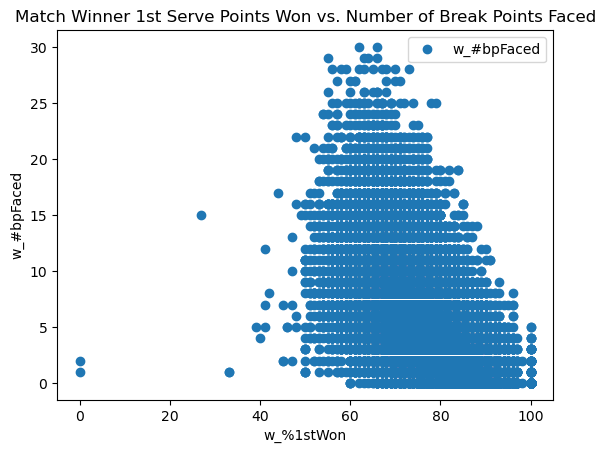

In [42]:
# Scatterplot - w_%1stWon vs. w_#bpFaced

df_matchstats.plot(x = 'w_%1stWon', y='w_#bpFaced',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Match Winner 1st Serve Points Won vs. Number of Break Points Faced')  
plt.xlabel('w_%1stWon')  
plt.ylabel('w_#bpFaced')  
plt.show()

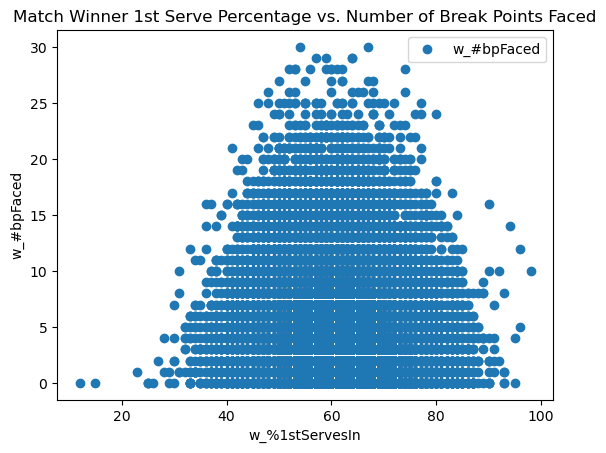

In [43]:
# Scatterplot - w_%1stServesIn vs. w_#bpFaced

df_matchstats.plot(x = 'w_%1stServesIn', y='w_#bpFaced',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Match Winner 1st Serve Percentage vs. Number of Break Points Faced')  
plt.xlabel('w_%1stServesIn')  
plt.ylabel('w_#bpFaced')  
plt.show()

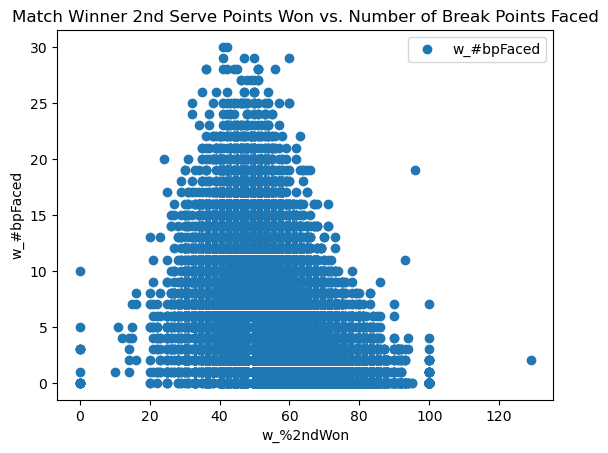

In [44]:
# Scatterplot - w_%2ndWon vs. w_#bpFaced

df_matchstats.plot(x = 'w_%2ndWon', y='w_#bpFaced',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Match Winner 2nd Serve Points Won vs. Number of Break Points Faced')  
plt.xlabel('w_%2ndWon')  
plt.ylabel('w_#bpFaced')  
plt.show()

# There is one obvious error; percentage can't be over 100%

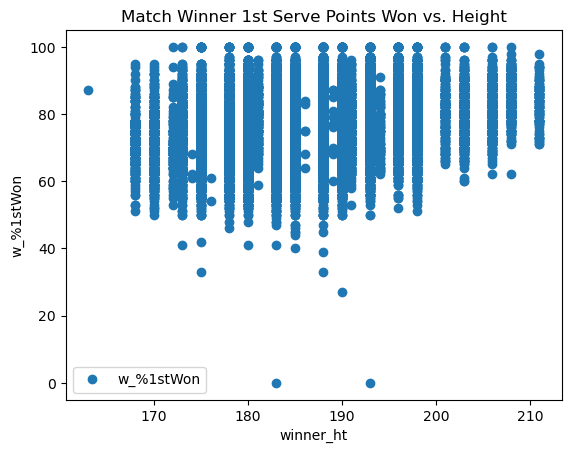

In [45]:
# Scatterplot - winner_ht vs. w_%1stWon 

df_matchstats.plot(x = 'winner_ht', y='w_%1stWon',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Match Winner 1st Serve Points Won vs. Height')  
plt.xlabel('winner_ht')  
plt.ylabel('w_%1stWon')  
plt.show()

### Prep for Regression Analysis: 1st Serve Points won and Break Points Faced

In [46]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_matchstats['w_%1stWon'].values.reshape(-1,1)
y = df_matchstats['w_#bpFaced'].values.reshape(-1,1)

In [47]:
X

array([[79],
       [75],
       [71],
       ...,
       [60],
       [63],
       [87]])

In [48]:
y

array([[5.],
       [6.],
       [1.],
       ...,
       [7.],
       [8.],
       [5.]])

In [49]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis: 1st Serve Points won and Break Points Faced

In [50]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [51]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

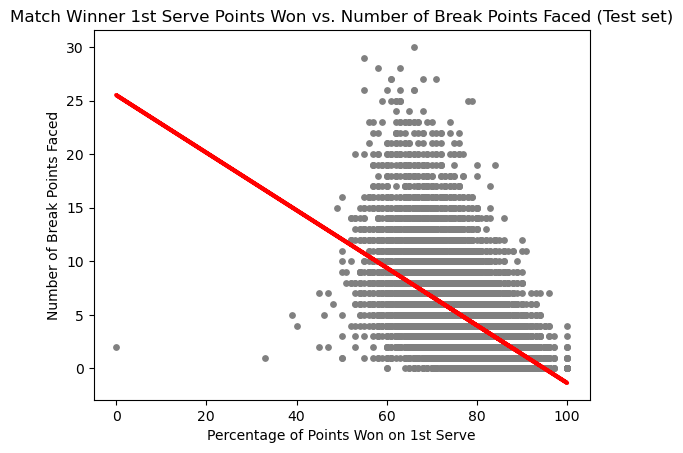

In [53]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Match Winner 1st Serve Points Won vs. Number of Break Points Faced (Test set)')
plot_test.xlabel('Percentage of Points Won on 1st Serve')
plot_test.ylabel('Number of Break Points Faced')
plot_test.show()

In [54]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [55]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.26853728]]
Mean squared error:  11.665159081139008
R2 score:  0.29223908689228784


In [56]:
y_predicted

array([[1.60813174],
       [6.71034014],
       [5.36765372],
       ...,
       [2.41374359],
       [2.68228087],
       [6.97887742]])

In [57]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(20)

,Actual,Predicted
0,2.0,1.608132
1,10.0,6.710340
2,16.0,5.367654
3,1.0,4.293505
4,19.0,9.395713
5,5.0,4.562042
6,4.0,6.978877
7,5.0,6.173266
8,0.0,4.562042
9,4.0,2.682281


##### Compare how the regression fits the training set

In [58]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [59]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [60]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.26853728]]
Mean squared error:  11.412760167853218
R2 score:  0.29485198867430207


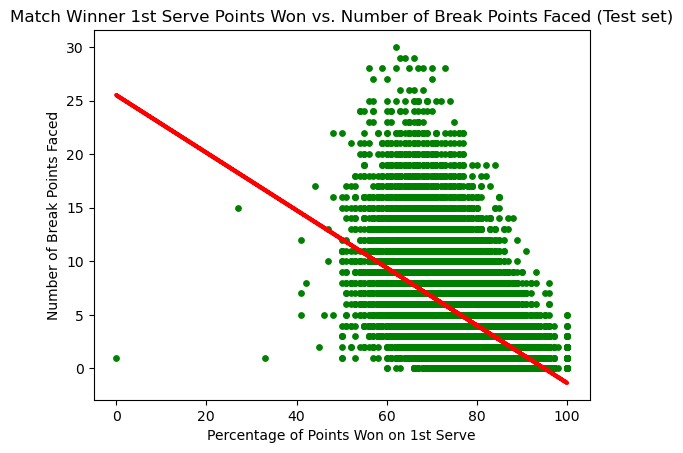

In [61]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Match Winner 1st Serve Points Won vs. Number of Break Points Faced (Test set)')
plot_test.xlabel('Percentage of Points Won on 1st Serve')
plot_test.ylabel('Number of Break Points Faced')
plot_test.show()

### 4. Final Thoughts

This model shows that a player's percentage of points won on 1st serve cannot accurately predict the number of break points he will face in a match. Although there is a clear negative correlation between the two variables, the R2 score of 0.29 shows that the regression model does not fit well.